In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Back to the basics

Before diving into the Bayesian ideas, we need to take a step back and introduce a formalism on which to rely throughout this class. The formalism looked for is the one of *probability theory*.

The key ingredients for us are:
- Some possible events $\omega$
- A space $\Omega$ to which all events belong;
- A collection of all possible events we can construct by combining (via **complement, union and intersection**) the elements of $\Omega$. This collection is known as *power set*, and usually denoted by $\mathcal{P}(\Omega)$.  $\mathcal{P}(\Omega)$ is a $\sigma$-algebra. Each subset $\Sigma$ of $\mathcal{P}(\Omega)$ is a $\sigma$-algebra as well if it satisfies:
  - $\Omega\in\Sigma$
  - $\Sigma$ is closed under complement operation: if $A\in\Sigma$ then $A^C\in\Sigma$
  - $\Sigma$ is closed under countable union: if $A_1,A_2\dots\in\Sigma$ then so is their union $A=A_1 \cup A_2 \cup \ldots$



- A *probability measure* $p$ is a function that associates to each event a measure in the interval $[0,1]$. The measure is such that: 
    - $p(\emptyset) = 0$ and $p(\Omega) = 1$,
    - $p(A_1 \cup A_2 \cup \ldots A_n) = p(A_1) + p(A_2) + \ldots p(A_n)$ (countable additivity) for every pairwise disjoint sets $A_1,\dots,A_n$.

**Example.** Let us consider a coin toss. We have 2 possible events: 
- $\omega_1 = \textrm{tail} := \textrm{T}$ and $\omega_1 = \textrm{head} := \textrm{H}$. 
- Then $\Omega=\{T,H\}$. 
- It follows that $\mathcal{P}(\Omega)=\{\emptyset,\{T\},\{H\},\{T,H\}\}$
- Supposing the coin fair: $p(T)=p(H)=1/2$


The next essential ingredient is the definition of *random variable*. We say that a random variable $X$ is a function that maps each element of $\Omega$ to a real number $r\in\mathbb{R}$. We require the variable to be *measurable*. Formally this means that, for any real value $r$, the set of events $\omega$ for which $\{ \omega \in \Omega; X(\omega) \leq r\}$ is still an element of the $\sigma$-algebra, i.e. it is still a possible event of our space. 

In simple words, we require that for any outcome related to the random variable, the probability of the associated event is well defined. The match between probabilities and events through the random variable $X$ is called *probability mass function* of $X$ for discrete variables, or *probability density function* for continuous ones.

**Example (from wikipedia).** The space $\Omega$ associated to a coin toss is $\Omega = \{tail, head\}$. A random variable $X$ associates to each element of $\Omega$ a real value. For example, we consider a game for which we earn 1 Euros for a head, and we lose 1 Euro for tail. Therefore, $X(tail) = -1$, and $X(head) = 1$. 

Thinking backwards, it makes sense to consider the space for which the condition $X = 1$ is true. This means to consider the space of events $A = \{ \omega \in \Omega; X(\omega) = 1\}$, and the associated probability measure $p(A)$. 
In our example, for a fair coin, we have $p(X = 1) = p(\{ \omega \in \Omega; X(\omega) = 1\}) = \frac{1}{2}$.


<img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Random_Variable_as_a_Function-en.svg" alt="By Niyumard - Own work, CC BY-SA 4.0, https://upload.wikimedia.org/wikipedia/commons/c/c4/Random_Variable_as_a_Function-en.svg" title="By Niyumard - Own work, CC BY-SA 4.0, https://upload.wikimedia.org/wikipedia/commons/c/c4/Random_Variable_as_a_Function-en.svg" width="400"/>


**Example (from wikipedia).** The events associated to the toss of two dice are all the possible couples of integers $(a,b)$, with $1\leq a \leq b \leq 6$. We consider the random variable $X$ which associates to each event the sum of the dice values $X((a,b)) = a+b$.

The probability mass function of $X$ is here illustrated:

<img
    src="https://upload.wikimedia.org/wikipedia/commons/1/12/Dice_Distribution_%28bar%29.svg"
    alt="By Tim Stellmach - Own work using Inkscape and Open Office Draw software., Public Domain, https://commons.wikimedia.org/w/index.php?curid=1220091"
    title="By Tim Stellmach - Own work using Inkscape and Open Office Draw software., Public Domain, https://commons.wikimedia.org/w/index.php?curid=1220091"
    width="400"
/>

## Joint probability

When dealing with multiple random variables, we often need to quantify the probability associated to their *joint realization*, which means quantifying their joint probability function.

Let's consider the following example. We are interested in the variable $X$ indicating the number of children per family, jointly with the varible $Y$ associating the number of bedrooms in the family house. The variable $X$ takes values in $\Omega^X = \{0, 1, \geq 2\}$, while the variable $Y$ in $\Omega^Y = \{1, 2, \geq 3\}$.

The joint probability for these discrete quantities can be assigned in terms of frequency table:



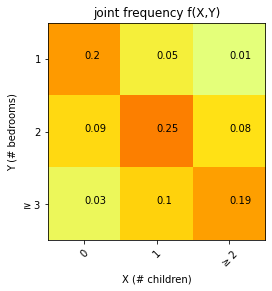

In [2]:
freq = [[0.2, 0.05, 0.01], [0.09, 0.25, 0.08], [0.03, 0.1, 0.19]]

plt.clf()
plt.imshow(freq, interpolation="nearest", cmap=plt.cm.Wistia)
X_values = ["0", "1", "$\geq2$"]
Y_values = ["1", "2", "$\geq3$"]
plt.ylabel("Y (# bedrooms)")
plt.xlabel("X (# children)")
plt.title("joint frequency f(X,Y)")
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(j, i, str(freq[i][j]))
plt.show()


This table represents the joint probability mass function $p(X,Y)$, for each value of the random variables. Note that, being both random variables discrete, the joint distribution will take a finite number of values as well.

We first note that the joint mass function follows the standard requirements for a probability function:



- each element is included in [0,1];

- it sums up to 1: $\sum_{X,Y}p(X,Y) = 1$:

In [8]:
print("The sum of all the probabilities is : ", np.sum(freq))


The sum of all the probabilities is :  1.0


Having access to the joint probability allows to draw information on the variables. For example, the probability of having more than 2 bedrooms and 1 child is:
$$p(X =1,\, Y > 2) = 0.1$$

If the variables are independent, the joint probability distribution factorises across variables:

$$p(X,Y)=p(X)p(Y)$$

## Marginal probability

Having acces to the joint distribution of two random variables allows to determine the distribution of each variable: we talk about marginal probability. The marginal probability quantifies the individual probability of a single variable, when we take into account **all the possible instances of the the other variable(s)**. 
For example, the probability of having more than 2 bedrooms, $p(Y \geq 3)$, is obtained by summing all the entries of the joint frequency table corresponding to the event $Y \geq 3$:
\begin{align}
p(Y \geq 3) &= p(X = 0 \cup X = 1 \cup X\geq 2 ,\, Y > 2) \\
&= p(X = 0 ,\, Y > 2) + p(X = 1 ,\, Y > 2) + p(X \geq 2 ,\, Y >2) \\
&= 0.03 + 0.1 + 0.19 = 0.32
\end{align}
In this case, we can say that the probability of finding a house with more than 2 bedrooms is $0.32$.

The marginal probability can be therefore quantified by *marginalizing* the other variables, i.e. by summing over all their possible instances by keeping our variable of interest fixed:

$$ p(X) = \sum_Y p(X,Y)$$
$$ p(Y) = \sum_X p(X,Y)$$

**Exercise.** Compute the marginal probablities for X and Y above, and verify theat they are valid probability measures.

In [16]:
X_prob = np.sum(a=freq, axis=0)
Y_prob = np.sum(a=freq, axis=1)

print("Marginal probabilities of X:")
for prob, val in zip(X_prob, X_values):
    print(f"\tProbability of X is {val} = {prob}")

print("\nMarginal probabilities of Y:")
for prob, val in zip(Y_prob, Y_values):
    print(f"\tProbability of Y is {val} = {prob}")

Marginal probabilities of X:
	Probability of X is 0 = 0.32000000000000006
	Probability of X is 1 = 0.4
	Probability of X is $\geq2$ = 0.28

Marginal probabilities of Y:
	Probability of Y is 1 = 0.26
	Probability of Y is 2 = 0.42
	Probability of Y is $\geq3$ = 0.32


Are $X$ and $Y$ independent?

# Conditional Probability

We are left with the last definition of probability for multivariate distributions, and perhaps the least intuitive. 
We assume that a given value for the variable $Y$ is known, for example $Y=2$. The question is: what is the distribution of the variable $X$ once this piece of information is available? 
With respect to the joint distribution, this requires to look at the space of events from the point of view of the row corresponding to $Y = 2$, which means to consider the probability space $p(X, Y=2)$:



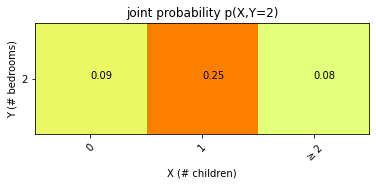

In [18]:
plt.imshow([freq[1]], interpolation="nearest", cmap=plt.cm.Wistia)
X_values = ["0", "1", "$\geq2$"]
Y_values = ["2"]
plt.ylabel("Y (# bedrooms)")
plt.xlabel("X (# children)")
plt.title("joint probability p(X,Y=2)")
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i, j, str([freq[1]][j][i]))
plt.show()


To define a valid probability function we need to normalize this function to 1, therefore by dividing by the sum of all the entries: $p(X=0, Y=2) + p(X=1, Y=2) + p(X\geq2, Y=2) = p(Y=2)$.
In this way we define a new probability function, called conditional probability of $X$ given $Y$ and indicated by $p(X|Y)$:

$$p(X|Y) = \frac{p(X,Y)}{p(Y)}$$


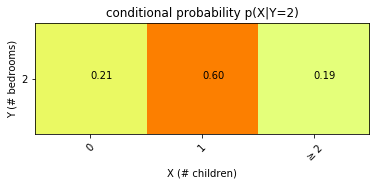

In [16]:
plt.imshow([freq[1]], interpolation="nearest", cmap=plt.cm.Wistia)
X_values = ["0", "1", "$\geq2$"]
Y_values = ["2"]
plt.ylabel("Y (# bedrooms)")
plt.xlabel("X (# children)")
plt.title("conditional probability p(X|Y=2)")
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i, j, "{:.2f}".format([freq[1]][j][i] / np.sum(freq[1])))
plt.show()


**Exercise.** In the game of throwing two dice, compute the probability that the sum of the outcomes is 7, given that one die was 2.

One die is 2 and the sume of both dies is 7 means the other die is 5.

\begin{align*}
p(X = 2 \cup Y = 2) 
&= 1/6 + 1/6 - 1/36 \\
&= 11/36
\end{align*}

In [27]:
d1 = list(range(1, 7))
d2 = list(range(1, 7))
grid = np.zeros(shape=(len(d1), len(d2))) - 1

for i in d1:
    for j in d2:
        grid[i - 1][j - 1] = i + j


array([ 8., 10., 12., 14., 16., 18.])

## Independent Random variables
In case of **independent variables**, conditioning a variable on another leaves the probability of the variable unchanged:

$$p(X|Y)=\frac{p(X,Y)}{p(Y)} = \frac{p(X)p(Y)}{p(Y)} = p(X)$$

# Expectation and Variance

Fundamental quantities associated to a random variable $X$ are the mean $\mathbf{E}(X)$ and variance $Var(X)$.
We recall their definition for discrete variables:

$$\mathbf{E}(X) = \sum_X p(X) X; $$ 

$$Var(X) = \mathbf{E}((X - \mathbf{E}(X))^2).$$

The expectation is a linear operator, which means that:

- $\mathbf{E}(kX) = k \mathbf{E}(X)$, for constant $k$;
- $\mathbf{E}(X + Y) = \mathbf{E}(X) + \mathbf{E}(Y)$, for random variables $X$ and $Y$;





**Exercise.** Prove the linearity of the expectation.
\begin{align*}
\mathbb{E} \left[ X + Y \right]
&= \sum_{X+Y} p \left( X + Y \right) \left( X + Y \right) \\
\end{align*}

Thanks to the linearity properties of the Expectation, the Variance can be reformulated as:

$$Var(X) = \mathbf{E}(X^2) - \mathbf{E}(X)^2$$

The proof is straighforward:

\begin{align}
Var(X) &= \mathbf{E}((X-\mathbf{E}(X))^2) = \mathbf{E}(X^2-2X\mathbf{E}(X) + \mathbf{E}(X)^2) \\
&= \mathbf{E}(X^2) - 2\mathbf{E}(X)\mathbf{E}(X) + \mathbf{E}(X)^2 \\
&= \mathbf{E}(X^2) - \mathbf{E}(X)^2
\end{align}

**Exercise.** Consider the random variables $X$ and $Y$ with following joint distribution:

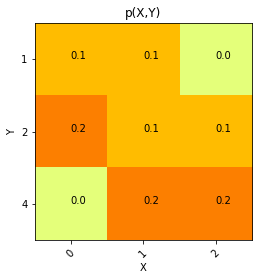

In [29]:
prob = np.array([[0.1, 0.1, 0.0], [0.2, 0.1, 0.1], [0.0, 0.2, 0.2]])

plt.clf()
plt.imshow(prob, interpolation="nearest", cmap=plt.cm.Wistia)
X = [0, 1, 2]
Y = [1, 2, 4]
plt.ylabel("Y")
plt.xlabel("X")
plt.title("p(X,Y)")
plt.xticks(np.arange(len(X)), X, rotation=45)
plt.yticks(np.arange(len(Y)), Y)
for i in range(len(X)):
    for j in range(len(Y)):
        plt.text(j, i, str(prob[i][j]))
plt.show()


Compute:

- $p(X)$
- $p(Y)$
- $\mathbf{E}(X)$
- $\mathbf{E}(Y)$
- $p(X|Y=4)$
- $p(Y|X=2)$


In [54]:
prob_X = np.sum(prob, axis=0)
prob_Y = np.sum(prob, axis=1)

for x, px in zip(X, prob_X):
    print(f"X = {x} has probability {px}")

for y, py in zip(Y, prob_Y):
    print(f"Y = {y} has probability {py}")

E_X = np.dot(X, prob_X)
E_Y = np.dot(Y, prob_Y)
print(f"Expectation of X: {E_X}")
print(f"Expectation of Y: {E_Y}")

prob_Y_4 = prob_Y[2]
print(f"Probability of X given that Y = 4: {prob[2] / prob_Y_4}")

prob_X_2 = prob_X[2]
print(f"Probability of X given that X = 2: {prob[:,2] / prob_X_2}")

X = 0 has probability 0.30000000000000004
X = 1 has probability 0.4
X = 2 has probability 0.30000000000000004
Y = 1 has probability 0.2
Y = 2 has probability 0.4
Y = 4 has probability 0.4
Expectation of X: 1.0
Expectation of Y: 2.6
Probability of X given that Y = 4: [0.  0.5 0.5]
Probability of X given that X = 2: [0.         0.33333333 0.66666667]


**Exercise.** The variables $X$ and $Y$ are independent and with following probability masses:

$$p(X=1) = 0.2 \qquad p(X=2) = 0.2 \qquad p(X=3) = 0.6$$
$$p(Y=0) = 0.4 \qquad p(Y=1) = 0.3 \qquad p(Y=2) = 0.3$$

Compute $\mathbf{E}(X)$, $\mathbf{E}(Y)$, $\mathbf{E}(X + Y)$, and $\mathbf{E}(XY)$.

In [59]:
X = [1, 2, 3]
Y = [0, 1, 2]
prob_X = [0.2, 0.2, 0.6]
prob_Y = [0.4, 0.3, 0.3]

E_X = np.dot(X, prob_X)
E_Y = np.dot(Y, prob_Y)

print("Expectation of:")
print(f"\tX: {E_X}")
print(f"\tY: {E_Y}")
print(f"\tX + Y: {E_X + E_Y}")
print(f"\tX * Y: {E_X * E_Y}")


Expectation of:
	X: 2.4
	Y: 0.8999999999999999
	X + Y: 3.3
	X * Y: 2.1599999999999997


# From discrete to continous variables

When working with continunos random variables, the concept seen so far naturally translates with the difference that the sum over finite cases transforms into an *integral* over the domain of interest. 
Here an overview of the basic notions:

- marginal: $p(X) = \int_Y p(X,Y) dY$;
- expectation: $\mathbf{E}(X) = \int_X X p(X) dX$;
- variance: $Var(X) = \int_X (X-\mathbf{E}(X))^2 p(X)dX$



**Exercise.** Let the joint probability density function of $X$ and $Y$ be:

$$ p(X,Y) = 8XY,\quad X,Y\in A\subset\mathrm{R}^2, $$

and let $A$ be the region bounded by the line $X=1$ and the line $X=Y$, and such that $X>0$ and $Y>0$.

- Verify that p(X,Y) is a valid probability density function

\begin{align*}
    \int_{X=0}^{1} \int_{Y=0}^{X} p(X, Y) dY dX
    &= \int_{X=0}^{1} \int_{Y=0}^{X} 8XY dY dX \\
    &= \int_{X=0}^{1} \left[ 4XY^2 \right]_{Y=0}^{X} dX \\
    &= \int_{X=0}^{1} 4X^3 dX \\
    &= \left[ X^4 \right]_{X=0}^{1} \\
    &= 1 \\
\end{align*}

- Compute $p(0.5<X<1,0<Y <0.5)$.
\begin{align*}
    p(X) 
    &= \int_{Y=0}^{X} 8XY dY \\
    &= 4X^3 \\
\end{align*}

- Compute $\mathbf{E}(X)$.


- Compute $p(Y|X)$, and verify that it is a valid probability function.


# Conditional Expectation and Variance

The conditional Expectation is the expectation of the conditional distribution $p(X|Y)$.

$$\mathbf{E}(X|Y) = \sum_X X p(X|Y)\qquad\text(discrete)$$
$$\mathbf{E}(X|Y) = \int_X X p(X|Y) dX\qquad\text(continuous)$$

Similarly we have:

$$Var(X|Y) = \sum_X (X - \mathbf{E}(X|Y))^2 p(X|Y)\qquad\text(discrete)$$
and 
$$Var(X|Y) = \int_X (X - \mathbf{E}(X|Y))^2 p(X|Y)dX\qquad\text(continuous)$$

**Exercise.**
Suppose $p(X,Y) = X+Y$, in the domain $0<X<1$, $0<Y<1$.
- Compute p(Y|X =0.5)


- Compute $\mathbf{E}(Y|X=\frac{1}{2})$


# Conditional distribution and Bayes' Theorem

The conditional distribution is symmetric with respect to the variables $X$ and $Y$. In particular, we have:

$$ p(X,Y) = p(X|Y) p(Y) = p(Y|X) p(X).$$

We can therefore derive  **Bayes' theorem**, the fundamental relationship at the basis of Bayesian Learning:

$$ p(X|Y) = \frac{p(Y|X)p(X)}{p(Y)}$$

In Bayes theorem, the conditional probability term  $p(Y|X)$  is called *likelihood*, while the term $p(X)$ is called *prior*. In particular, the prior encodes our knowledge about $X$ independently from the $Y$, while the likelihood expresses our model for $Y$ once the variable $X$ is known. In the following lessons, we will see that the likelihood term will enable to link data to model parameters. 
As we have seen before, the denominator term $p(Y)$ is a normalizing constant. It can be found by marginalization: $p(Y) = \sum_X p(X,Y) = \sum_X p(Y|X)p(X)$, for discrete variables, and $p(Y) = \int_X p(X,Y) dx = \int_X p(Y|X)p(X) dX$, for continuous ones. 


**Exercise.**

A diagnostic test has a probability $0.95$ of giving a positive result when applied to a person suffering from a certain disease, and a probability $0.10$ of giving a (false) positive when applied to a non-sufferer. It is estimated that $0.5\%$ of the population are sufferers. Suppose that the test is now administered to a person about whom we have no relevant information relating to the disease (apart from the fact that he/she comes from this population). Calculate the following probabilities:
- that the test result will be positive;
- that, given a positive result, the person is a sufferer;
- that, given a negative result, the person is a non-sufferer;
- that the person will be misclassified.

**Exercise. (the Monty Hall problem)** 
Assume that a room is equipped with three doors. Behind two are goats, and behind the third is a shiny new car. You are asked to pick a door, and will win whatever is behind it. Let's say you pick door 1. Before the door is opened, however, the presenter who knows what's behind the doors  opens one of the other two doors, revealing a goat. The presenter then asks you if you wish to change your selection to the third door (i.e., the door which neither you picked nor he opened). The Monty Hall problem is deciding what you are going to do. (This is a famous example of logical thinking, and can be found for example in https://en.wikipedia.org/wiki/Monty_Hall_problem)

We have here 3 doors (1,2, and 3), and we selected the door number 1. Let's say that the door that was open is number 2. 
We have here 2 choices, *change* to door 3, or *stay* in door 1. 
We ultimately need to compute the probability of winning under the different strategies $p(1 = car | open 2)$ (stay), and $p(1 = goat | open 2)$ (change). 

We apply the Bayes rule: 
    
$$p(\text{car behind 1}| \text{open 2 after choice}) = \frac{p( \text{open 2 after choice}| \text{car behind 1} ) p(\text{car behind 1})}{p(\text{open 2 after choice})}$$

Before the game starts, without any knowledge, we have that  $p(\text{car behind 1}) = p(\text{car behind 2}) = p(\text{car behind 3}) = \frac{1}{3}$.
After we make the choice, the choice of the presenter, (event $\text{open 2 after choice}$) depends on the choice we made. If the car is behind door 1, and thus we are right, the presenter has two possibilities for his choice $p(\text{open 2 after choice}| \text{car behind 1}) = \frac{1}{2}$. 

We now assume that however the car is not beyond door 1, and thus our choice is wrong. If the car is behind door 2, the presenter cannot open that door, thus $p(\text{open 2 after choice}| \text{car behind 2}) = 0$. If the car is behind door 3, the presenter will be forced to open door 2:  $p(\text{open 2 after choice}| \text{car behind 3}) = 1$. 


We therefore have 
\begin{align}
p(\text{open 2 after choice}) &= \sum_{door} p(\text{open 2 after choice} , \text{car behind door} ) \\
&= \sum_{door} p(\text{open 2 after choice} | \text{car behind door} ) p(\text{car behind door} )\\
&= p(\text{open 2 after choice} | \text{car behind 1} ) p(\text{car behind 1} ) \\
&+ p(\text{open 2 after choice} | \text{car behind 2} ) p(\text{car behind 2} ) \\
&+ p(\text{open 2 after choice} | \text{car behind 3} ) p(\text{car behind 3} ) \\
&= \frac{1}{2} \frac{1}{3} + 0 \frac{1}{3} + 1 \frac{1}{3} =  \frac{1}{3} = \frac{1}{2}
\end{align}

Substituting in the Bayes rule we have:

$$p(\text{car behind 1}| \text{open 2 after choice}) = \frac{\frac{1}{2}\frac{1}{3}}{\frac{1}{2}} = \frac{1}{3}.$$

We also have

$$p(\text{car behind 3}| \text{open 2 after choice}) = \frac{1\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}.$$

Therefore it is convenient to change the door (!).


*Remark.* For those following the course on model selection, this problem involves the computation of the *Bayes factor* between the models $p(\text{car behind 1}| \text{open 2 after choice})$ and $p(\text{car behind 3}| \text{open 2 after choice})$.